In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
'''
    #1. Load and normalizing the CIFAR10 training and test datasets 
    using torch vision
'''

'\n\n    Load data (CIFAR10) into a numpy array\n'

In [5]:
# 3x32x32
# 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 
# 'horse', 'ship', 'truck'
# 1. Load data (CIFAR10) into a numpy array
# 2. Convert this array into torch.*Tensor

import torch
import torchvision
import torchvision.transforms as transforms

In [39]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
# num_workers
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True, 
                                          num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                        train=False,
                                        download=True, 
                                        transform=transform)
# num_workers
testloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=False, 
                                          num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
          'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


truck   car  frog  ship


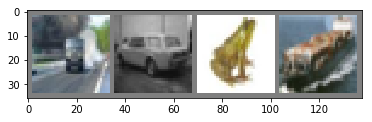

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
'''
    #2. Define a Convolution Neural Network
'''

In [66]:
from torch.autograd import Variable
import torch.nn as nn 
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # channel, output_dim, fiter_dim
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [87]:
net = Net()
net = net.cuda()
print(net)

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [68]:
'''
   #3. Define a Loss function and optimizer
'''

'\n   #3. Define a Loss function and optimizer\n'

In [88]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001 , momentum=0.9)

In [70]:
'''
    #4. Train the netowrk
'''

'\n    #4. Train the netowrk\n'

In [91]:
for epoch in range(2): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), \
                         Variable(labels.cuda())
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
    
print('Finished Training') 

[1,  2000] loss: 2.198
[1,  4000] loss: 1.844
[1,  6000] loss: 1.690
[1,  8000] loss: 1.567
[1, 10000] loss: 1.525
[1, 12000] loss: 1.476
[2,  2000] loss: 1.405
[2,  4000] loss: 1.394
[2,  6000] loss: 1.392
[2,  8000] loss: 1.342
[2, 10000] loss: 1.324
[2, 12000] loss: 1.311
Finished Training


In [38]:
'''
    #5. Test the network on the test data
'''

'\n    #5. Test the network on the test data\n'

GroundTruth:   frog truck truck  deer


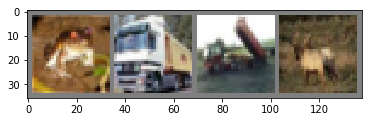

In [78]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [82]:
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j][0]]
                             for j in range(4)))

Predicted:   frog truck horse  deer


In [85]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [86]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 63 %
Accuracy of   car : 63 %
Accuracy of  bird : 45 %
Accuracy of   cat : 40 %
Accuracy of  deer : 57 %
Accuracy of   dog : 34 %
Accuracy of  frog : 71 %
Accuracy of horse : 65 %
Accuracy of  ship : 64 %
Accuracy of truck : 72 %


In [ ]:
net.cuda()
